<a href="https://colab.research.google.com/github/TakumiUsu1/neural-network-projects/blob/main/fashionmnist_classifier_program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FashionMNIST Image Classification with PyTorch
---
This notebook demonstrates how to classify grayscale images of clothing from the FashionMNIST dataset using PyTorch. We'll build and compare two models—a simple baseline and a slightly deeper network—and evaluate their performance.


## 1. Load and Visualize Data

100%|██████████| 26.4M/26.4M [00:01<00:00, 20.4MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 338kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 6.22MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 8.57MB/s]


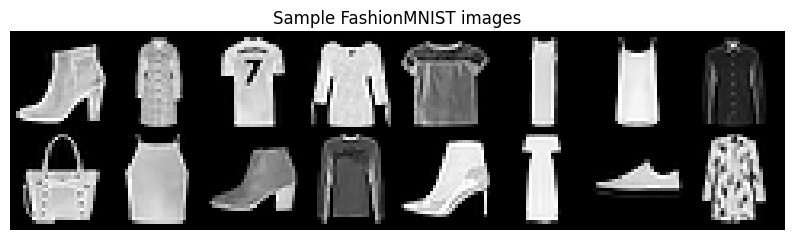

In [ ]:
import torch
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Transformation
transform = transforms.Compose([transforms.ToTensor()])

# Download and load training and test data
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

# Visualize sample images
def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.set_title("Sample FashionMNIST images")
        ax.imshow(torchvision.utils.make_grid(images[:16], nrow=8).permute(1, 2, 0))
        ax.axis('off')
        break

show_batch(train_loader)

## 2. Define Neural Network Models

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = SimpleNN()

## 3. Train the Model

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

def train(model, train_loader, criterion, optimizer, epochs=5):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")

train(model, train_loader, criterion, optimizer)

Epoch 1, Loss: 0.5161
Epoch 2, Loss: 0.3757
Epoch 3, Loss: 0.3414
Epoch 4, Loss: 0.3170
Epoch 5, Loss: 0.3006


## 4. Evaluate the Model

In [ ]:
def evaluate(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print(f"Test Accuracy: {100 * correct / total:.2f}%")

evaluate(model, test_loader)

Test Accuracy: 87.32%


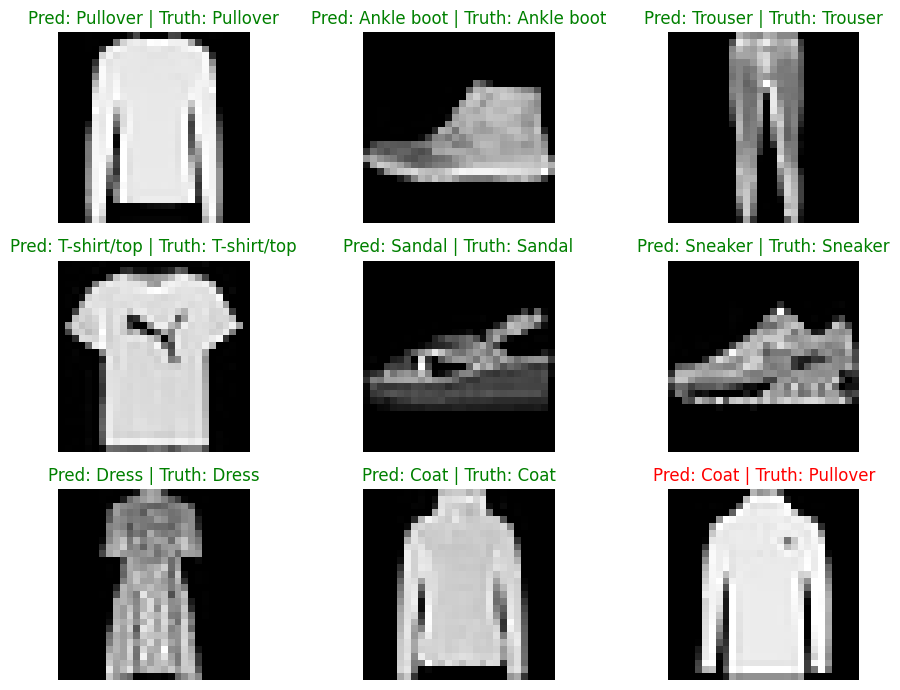

In [ ]:
import random

# Class labels for FashionMNIST
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_random_predictions(model, dataset, n=9):
    model.eval()
    indices = random.sample(range(len(dataset)), n)
    images = torch.stack([dataset[i][0] for i in indices])
    labels = torch.tensor([dataset[i][1] for i in indices])

    with torch.no_grad():
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

    fig, axes = plt.subplots(3, 3, figsize=(10, 7))
    axes = axes.flatten()

    for i in range(n):
        ax = axes[i]
        ax.imshow(images[i].squeeze(), cmap="gray")
        pred_label = class_names[preds[i]]
        true_label = class_names[labels[i]]
        color = "green" if pred_label == true_label else "red"
        ax.set_title(f"Pred: {pred_label} | Truth: {true_label}", color=color)
        ax.axis("off")

    plt.tight_layout()
    plt.show()

# Example usage (pass test_data, not the DataLoader):
plot_random_predictions(model, test_data)


## 5. Conclusion
This notebook provided a simple baseline model for classifying FashionMNIST images using PyTorch. While accuracy can be improved with CNNs or more training, this demonstrates the workflow from loading data to evaluation.